# Features
* To try to find the transformation between two images, we can compute the fundamental matrix, if we know enough corresponding points between these images.
* To find corresponding points, we need to find *local features*
* Local implies that the features should be readily identifyable locally.
* Feature implies that it should be a unique location

## Characteristics of a good feature
* **Repeatability / Precision**: The same features should be easily findable across multiple pictures of the same scene.
* **Salience / Matchability**: The feature should be unique in that it should not be similar to other features found in the same image or other images of the same scene.
* **Compactness / Efficiency**: The number of features / total number of pixels in the image should be very low. We should be able to identify important features and not tag every pixel as a feature.
* **Locality**: A feature should occupy a relatively small area of the image. We cannot take half the image and call it a feature, because in different images of the scene, we'll get different parts of the image occluded, so having small localized features make it better to compare.

## Harris Corners
* Corners (where there is change in more than 2 dimensions) make excellent features.
* To find corners, we take a point x,y and compute it's difference wrt shifts in both x & y direction (say u,v)
$$E(u,v) = \sum_{x,y}w(x,y)[I(x+u,y+v)-I(x,y)]^2$$
where
  * w(x,y) is the weight of the summing, where we apply a guassian weight, so as we go away from the pixel in question, the weights reduce (those changes contribute lesser to our need).
  * I(x,y) is the image pixel
* When E(u,v) is large, then we know that it's a good feature
* we need to model this on small shifts that we'll do, say delta u and delta v; and we would like to see a massive change even for a small shift (welcome calculus)
* We are going to do a second order taylor expansion around u & v being 0

1) A taylor expansion for a function f(x) at a point delta x near 0 is approximately
$$F(\delta x) \approx F(0) + \delta x \frac{dF(0)}{dx} + \frac{\delta x^2}{2}\frac{d^2F(0)}{dx^2}$$
  * this is for 1d
  
2) So writing the above E(u,v) in terms of taylor expansion gives us
$$E(u,v) \approx E(0,0) + [u,v]\left[\begin{array}{}E_u(0,0)\\E_v(0,0)\end{array}\right] + \frac{1}{2}[u,v]\left[\begin{array}{}E_{uu}(0,0) & E_{uv}(0,0)\\E_{uv}(0,0) & E_{vv}(0,0)\end{array}\right]\left[\begin{array}{}u\\v\end{array}\right]$$
  * where Euu is the 2nd order differential in the u direction
  
3) Expanding the first order derivative Eu(u,v) and differentiating E(0,0) in the u direction
$$E_u(u,v) = \sum_{x,y}2w(x,y)[I(x+u,y+v)-I(x,y)]I_x(x+u,y+v)$$
  * The square term becomes 2*x
  * And we add the differential of I in the x direction
  
4) Similarly Ev(u,v) is similar
$$E_v(u,v) = \sum_{x,y}2w(x,y)[I(x+u,y+v)-I(x,y)]I_y(x+u,y+v)$$

5) Now for the second derivatives, remember d(ab) = a(db) + b(da)
$$E_{uu}(u,v) = \sum_{x,y}2w(x,y)\big[I_x(x+u,y+v)I_x(x+u,y+v) + [I(x+u,y+v)-I(x,y)]I_{xx}(x+u,y+v)\big]$$
$$E_{uv}(u,v) = \sum_{x,y}2w(x,y)\big[I_x(x+u,y+v)I_y(x+u,y+v) + [I(x+u,y+v)-I(x,y)]I_{xy}(x+u,y+v)\big]$$
$$E_{vv}(u,v) = \sum_{x,y}2w(x,y)\big[I_y(x+u,y+v)I_y(x+u,y+v) + [I(x+u,y+v)-I(x,y)]I_{yy}(x+u,y+v)\big]$$
  
6) Now comes the best part, we need to evaluate u,v at 0,0 right (as close to the pixel as possible). So substituting 0,0 for all u,v here we get
$$E(0,0) = 0$$
$$E_u(u,v) = \sum_{x,y}2w(x,y)[I(x,y)-I(x,y)]I_x(x,y) = 0$$
$$E_v(u,v) = \sum_{x,y}2w(x,y)[I(x,y)-I(x,y)]I_y(x,y) = 0$$
$$E_{uu}(u,v) = \sum_{x,y}2w(x,y)\big[I_x(x,y)I_x(x,y) + [I(x,y)-I(x,y)]I_{xx}(x,y)\big] = \sum_{x,y}2w(x,y)(I_x(x,y))^2$$
$$E_{uv}(u,v) = \sum_{x,y}2w(x,y)\big[I_x(x,y)I_y(x,y) + [I(x,y)-I(x,y)]I_{xy}(x,y)\big] = \sum_{x,y}2w(x,y)I_x(x,y)I_y(x,y)$$
$$E_{vv}(u,v) = \sum_{x,y}2w(x,y)\big[I_y(x,y)I_y(x,y) + [I(x,y)-I(x,y)]I_{yy}(x,y)\big] = \sum_{x,y}2w(x,y)(I_y(x,y))^2$$

7) So submithing this back in 2 gives us
$$E(u,v) \approx \sum_{x,y}w(x,y)\left[[u,v]\left[\begin{array}{}(I_x(x,y))^2 & I_x(x,y)I_y(x,y)\\I_x(x,y)I_y(x,y) & (I_y(x,y))^2\end{array}\right]\left[\begin{array}{}u\\v\end{array}\right]\right]$$

8) Simplifying further
$$E(u,v) \approx [u v]M\left[\begin{array}{}u\\v\end{array}\right]$$
where
$$M = \sum\left[\begin{array}{}I_x^2 & I_xI_y\\I_xI_y & I_y^2\end{array}\right]$$
$$M = \sum\left[\left[\begin{array}{}I_x\\I_y\end{array}\right][\begin{array}{}I_x & I_y\end{array}]\right]$$
  * Note that this is a matrix that's summed across all points around x,y
  * So for this matrix to be full rank, there should be significant variations in all directions
  * Only then will we be summing up different rank 1 matrices to get a rank higher matrix
 
9) Consider what this equation looks like geometrically
$$\sum_{} I_x^2u^2 + 2\sum_{} I_xI_yuv + \sum_{} I_y^2v^2 = k$$
  * This is an elipse in u,v space
  ![](img\MomentMatrix.png)
  * Each of the ellipse is a different k
  * So basically what the 2nd order taylor expansion does is to approximate this parabola as various ellipses.
  
10) Consider where the image is axis aligned (as it typically should be), then the cross gradients should be 0
$$M = \sum\left[\begin{array}{}\lambda_1 & 0\\0 & \lambda_2\end{array}\right]$$
  * This is a nice full rank matrix as long as both the lambdas (eigenvalues) have a value, i.e.: when there is a gradient change in both the directions.
  * So we need to find places in the image which have large lambda (both of them)
 
11) In general to achieve this, we can rotate the matrix to achieve the cross gradients to be 0 and re-rotate back (LDU decompose)
$$M = R^{-1}\left[\begin{array}{}\lambda_1 & 0\\0 & \lambda_2\end{array}\right]R$$

12) So the algorithm boils down as
  * If both lambdas are small (it's a flat region)
  * if lambda1 >>> lambda2 or lambda2 >>> lambda1, then it's an edge pixel
  * If both lambdas are large then it's a corner
 
13) An easier way by Harris was to compute
$$R = det(A) - \alpha Trace(A)^2 = \lambda_1 \lambda_2 - \alpha(\lambda_1 + \lambda_2)^2$$
  * alpha was generally around 0.04 to 0.06
  * If R is large, then it's a corner
  
## Python example

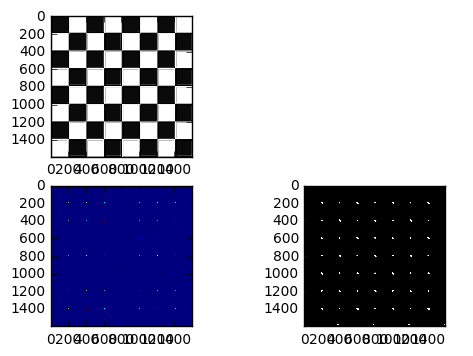

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the image
img = cv2.imread("CheckerBoard.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Find corners
harris = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
harris = cv2.dilate(dst,None)

# Do the Shi Tomas features
shi = cv2.goodFeaturesToTrack(gray,85,0.04,10)
shi = np.int0(shi)
shiout = np.zeros(gray.shape)
for i in shi:
    x,y = i.ravel()
    cv2.circle(shiout,(x,y),9,255,-1)

# show the image
plt.subplot(221),plt.imshow(img)
plt.subplot(223),plt.imshow(harris)
plt.subplot(224),plt.imshow(shiout, cmap="Greys_r")
plt.show()

# Scale Invariance
* The harris corners are invariant to rotation (which is great)
* It's also invariant to additive or multiplicative intensity shifts (as we take the derivatives)
* **Not** invariant to scaling...

## Scale invariant detection
* Take a function that's scale invariant (say the average intensity of the pixels within a circle)
* At each point, compute the function for different sizes of the circle (different scales)
* When we compute this function over say a shrinked image, the function is going to have a similar shape, but it's also going to be shrinked.
![](img/ScaleInvariance.png)
* Now take the maximum of both the functions, by comparing where these two are, we can find the scales of both of the images.

## Scale detection function
* No one uses average intensity in real life.
* some factors that this function should have will be
  * It should preferable gradually increase till a global single maxima and should gradually decrese post it
* Typical edge detection kernels such as laplacian / guassian are excellent for this The DOG (Difference of Guassian) is the best function

## Algo
1) Take an image and loop over various guassian over it
2) Subtract consecutive guassians to get the difference of guassians
3) Loop over various scales of the image and find the DOGs
4) Each pixel in the image has 8 neighbours around it in the same scale, and 9 in the previous scale and 9 in the next scale.
5) If the pixel is a extremum (max of min) of all of these 26 neighbours, then that's a corner


